# **Maternal Health Analysis Per County of Residence in the year 2018**

In [3]:
# libraries import
# from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib notebook

In [4]:
# Data upload
# data = files.upload()


In [5]:
dataset = pd.read_csv('data.csv')

# Data Exploration

In [6]:
# print the length of the dataset
len(dataset)

501

In [7]:
# print the first five rows of the dataset
dataset.head()

,"Table name: county_natality Last updated: Nov 14, 2022 7:31 PM",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Year,County_of_Residence,County_of_Residence_FIPS,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks
1,1/1/2018,"Calhoun County, AL",01015,1265,26.67,38.11,38.25,3168.14,28.85,10.45
2,1/1/2018,"Tulsa County, OK",40143,8933,28.13,38.18,38.25,3243.39,27.58,11.04
3,1/1/2018,"Carroll County, GA",13045,1540,27.2,38.5,38.5,3253.35,27.98,10.75
4,1/1/2018,"Saginaw County, MI",26145,2182,27.41,38.75,38.5,3226.9,28.85,11.58


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Table name: county_natality Last updated: Nov 14, 2022 7:31 PM  501 non-null    object
 1   Unnamed: 1                                                      501 non-null    object
 2   Unnamed: 2                                                      501 non-null    object
 3   Unnamed: 3                                                      501 non-null    object
 4   Unnamed: 4                                                      501 non-null    object
 5   Unnamed: 5                                                      501 non-null    object
 6   Unnamed: 6                                                      501 non-null    object
 7   Unnamed: 7                                                    

In [9]:
# Create a dataframe using pandas
df = pd.DataFrame(dataset)

In [10]:
# print("Unmodified dataframe")
# df

In [11]:
# Data Cleaning
# Modify Dataframe by deleting the header, and setting the first row as new header
df = df.rename(columns=df.iloc[0]).drop(df.index[0])

# Drop the first column
df.drop(["Year", "County_of_Residence_FIPS" ], axis = 1, inplace = True)
print("Modified dataframe")
df

Modified dataframe


,County_of_Residence,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks
1,"Calhoun County, AL",1265,26.67,38.11,38.25,3168.14,28.85,10.45
2,"Tulsa County, OK",8933,28.13,38.18,38.25,3243.39,27.58,11.04
3,"Carroll County, GA",1540,27.2,38.5,38.5,3253.35,27.98,10.75
4,"Saginaw County, MI",2182,27.41,38.75,38.5,3226.9,28.85,11.58
5,"Hillsborough County, FL",17126,28.97,38.41,38.5,3230.36,26.75,10.64
...,...,...,...,...,...,...,...,...
496,"Butler County, OH",4472,28.6,38.35,38.52,3276.42,27.54,11.8
497,"District of Columbia, DC",9212,30.85,38.51,38.52,3205.47,25.88,10.28
498,"Unidentified Counties, MD",5451,28.55,38.56,38.77,3307.82,27.72,11.67
499,"Mesa County, CO",1655,27.89,38.55,38.77,3194.48,26.89,10.81


In [12]:
# print dataframe rows and col.
df.shape

(500, 8)

In [17]:
df

,County_of_Residence,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks
1,"Calhoun County, AL",1265,26.67,38.11,38.25,3168.14,28.85,10.45
2,"Tulsa County, OK",8933,28.13,38.18,38.25,3243.39,27.58,11.04
3,"Carroll County, GA",1540,27.2,38.5,38.5,3253.35,27.98,10.75
4,"Saginaw County, MI",2182,27.41,38.75,38.5,3226.9,28.85,11.58
5,"Hillsborough County, FL",17126,28.97,38.41,38.5,3230.36,26.75,10.64
...,...,...,...,...,...,...,...,...
496,"Butler County, OH",4472,28.6,38.35,38.52,3276.42,27.54,11.8
497,"District of Columbia, DC",9212,30.85,38.51,38.52,3205.47,25.88,10.28
498,"Unidentified Counties, MD",5451,28.55,38.56,38.77,3307.82,27.72,11.67
499,"Mesa County, CO",1655,27.89,38.55,38.77,3194.48,26.89,10.81


In [18]:
df.describe()

,County_of_Residence,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks
count,500,500,500,500,500,500,500,500
unique,500,471,317,96,89,494,250,274
top,"Calhoun County, AL",1506,28.86,38.5,38.63,3226,27.98,11.33
freq,1,3,6,15,18,2,9,6


In [20]:
# Attributes correlation
# df.corr()

<IPython.core.display.Javascript object>


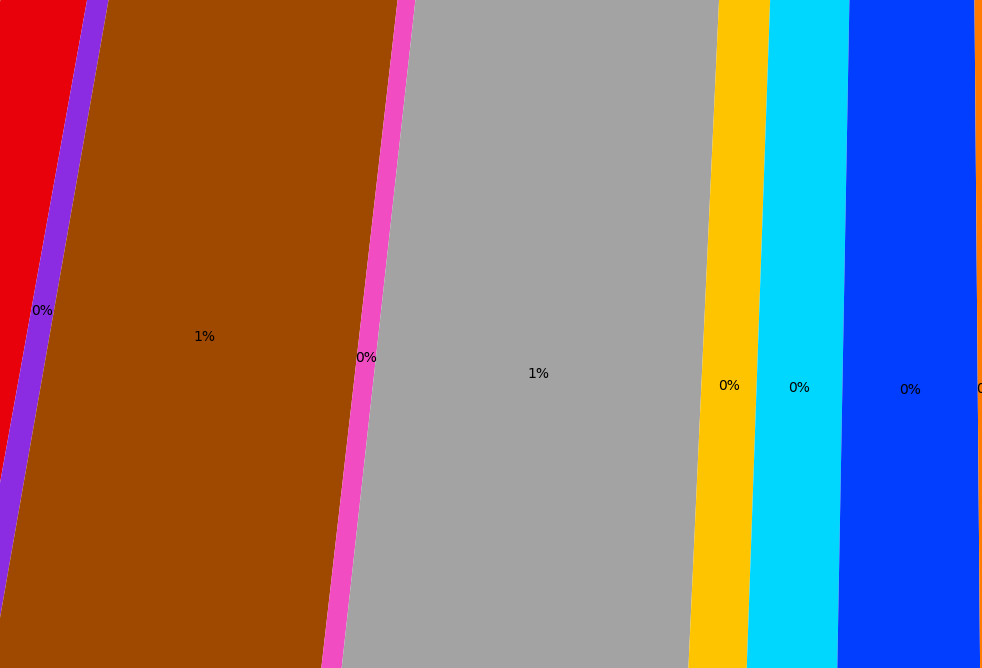

In [25]:
# Visualization

features = ["County_of_Residence", "Births", "Ave_Age_of_Mother", "Ave_OE_Gestational_Age_Wks", "Ave_LMP_Gestational_Age_Wks", "Ave_Birth_Weight_gms", "Ave_Pre_pregnancy_BMI", "Ave_Number_of_Prenatal_Wks"]
# Pie chart showing region and birth relationship
palette_color = sb.color_palette('bright')  # seaborn color pallete
plt.pie(df["Births"], labels=df["County_of_Residence"], colors=palette_color, autopct='%.0f%%')
plt.show()



In [ ]:

sb.pairplot(df, vars = ["Ave_Age_of_Mother", "Ave_LMP_Gestational_Age_Wks", "Ave_Birth_Weight_gms", "Ave_Number_of_Prenatal_Wks" "Births"])
plt.show()